# Question 1 : Bank Dataset 

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier

In [2]:
bank = pd.read_csv('C:/Users/Administrator/Desktop/Datasets/bank.csv', sep= ';')

bank_new = bank.drop('y', axis = 1)

bank_dummies = pd.get_dummies(bank_new)

bank_dummies['y'] = bank['y']

train, test = train_test_split(bank_dummies, test_size = 0.3, random_state = 100)

train_y = train['y']
test_y = test['y']
train_x = train.drop('y', axis = 1)
test_x = test.drop('y', axis = 1)

## Decision Tree

In [3]:
model_dt = DecisionTreeClassifier(random_state=100)
model_dt.fit(train_x, train_y)

test_pred_dt = model_dt.predict(test_x)
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(test_y, test_pred_dt).ravel()
tn_dt, fp_dt, fn_dt, tp_dt


(11124, 861, 804, 775)

In [4]:
accuracy_dt = (tp_dt+tn_dt) / (tp_dt+tn_dt+fp_dt+fn_dt) * 100
sensitivity_dt = tp_dt / (tp_dt+fn_dt) * 100
specificity_dt = tn_dt / (fp_dt+tn_dt) * 100
specificity_dt, sensitivity_dt, accuracy_dt


(92.81602002503129, 49.08169727675744, 87.72485992332645)

## Random Forest

In [5]:
model_rf = RandomForestClassifier(random_state=100)
model_rf.fit(train_x, train_y)

test_pred_rf = model_rf.predict(test_x)
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(test_y, test_pred_rf).ravel()
tn_rf, fp_rf, fn_rf, tp_rf


(11643, 342, 1018, 561)

In [6]:
accuracy_rf = (tp_rf+tn_rf) / (tp_rf+tn_rf+fp_rf+fn_rf) * 100
sensitivity_rf = tp_rf / (tp_rf+fn_rf) * 100
specificity_rf = tn_rf / (fp_rf+tn_rf) * 100
specificity_rf, sensitivity_rf, accuracy_rf

(97.14643304130163, 35.52881570614313, 89.97345915659098)

## AdaBoost

In [7]:
model_ab = AdaBoostClassifier(random_state=100)
model_ab.fit(train_x, train_y)

test_pred_ab = model_ab.predict(test_x)
tn_ab, fp_ab, fn_ab, tp_ab = confusion_matrix(test_y, test_pred_ab).ravel()
tn_ab, fp_ab, fn_ab, tp_ab

(11585, 400, 994, 585)

In [8]:
accuracy_ab = (tp_ab+tn_ab) / (tp_ab+tn_ab+fp_ab+fn_ab) * 100
sensitivity_ab = tp_ab / (tp_ab+fn_ab) * 100
specificity_ab = tn_ab / (fp_ab+tn_ab) * 100
specificity_ab, sensitivity_ab, accuracy_ab


(96.6624947851481, 37.0487650411653, 89.72279563550575)

## KNN

### Standardizing the data

In [9]:
scaler = StandardScaler()
bank_scaled = scaler.fit_transform(bank_dummies.drop('y', axis = 1))
bank_scaled = pd.DataFrame(bank_scaled, columns=bank_dummies.drop('y', axis = 1).columns)
bank_scaled['y'] = bank['y']

train, test = train_test_split(bank_scaled, test_size=0.3, random_state=100)

train_x = train.drop('y', axis=1)
train_y = train['y']

test_x = test.drop('y', axis=1)
test_y = test['y']

In [14]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_x, train_y)

test_pred_kn = model_knn.predict(test_x)
tn_kn, fp_kn, fn_kn, tp_kn = confusion_matrix(test_y, test_pred_kn).ravel()
tn_kn, fp_kn, fn_kn, tp_kn

(11589, 396, 1058, 521)

In [15]:
accuracy_kn = (tp_kn+tn_kn) / (tp_kn+tn_kn+fp_kn+fn_kn) * 100
sensitivity_kn = tp_kn / (tp_kn+fn_kn) * 100
specificity_kn = tn_kn / (fp_kn+tn_kn) * 100
specificity_kn, sensitivity_kn, accuracy_kn

(96.69586983729663, 32.99556681443952, 89.28044824535534)

## Creating Dataframe

In [16]:
#df_bank = pd.DataFrame({'Decision Tree':dt, 'Random Forest':rf, 'AdaBoost':ab})

dt = pd.Series({'True Positive': tp_dt, 'True Negative': tn_dt, 'False Positive': fp_dt, 'False Negative': fn_dt, 'Accuracy': accuracy_dt, 'Sensitivity': sensitivity_dt, 'Specificity': specificity_dt})
rf = pd.Series({'True Positive': tp_rf, 'True Negative': tn_rf, 'False Positive': fp_rf, 'False Negative': fn_rf, 'Accuracy': accuracy_rf, 'Sensitivity': sensitivity_rf, 'Specificity': specificity_rf})
ab = pd.Series({'True Positive': tp_ab, 'True Negative': tn_ab, 'False Positive': fp_ab, 'False Negative': fn_ab, 'Accuracy': accuracy_ab, 'Sensitivity': sensitivity_ab, 'Specificity': specificity_ab})
kn = pd.Series({'True Positive': tp_kn, 'True Negative': tn_kn, 'False Positive': fp_kn, 'False Negative': fn_kn, 'Accuracy': accuracy_kn, 'Sensitivity': sensitivity_kn, 'Specificity': specificity_kn})

#df_bank = df_bank.append({'Decision Tree':dt, 'Random Forest':rf, 'AdaBoost':ab}, ignore_index=True)
#df_bank
df_bank = pd.DataFrame({'Decision Tree':dt, 'Random Forest':rf, 'AdaBoost':ab, 'KNN': kn})
df_bank

,Decision Tree,Random Forest,AdaBoost,KNN
True Positive,775.000000,561.000000,585.000000,521.000000
True Negative,11124.000000,11643.000000,11585.000000,11589.000000
False Positive,861.000000,342.000000,400.000000,396.000000
False Negative,804.000000,1018.000000,994.000000,1058.000000
Accuracy,87.724860,89.973459,89.722796,89.280448
Sensitivity,49.081697,35.528816,37.048765,32.995567
Specificity,92.816020,97.146433,96.662495,96.695870


# Question 2 : IRIS Dataset

In [19]:
iris = pd.read_csv('C:/Users/Administrator/Desktop/Datasets/iris.csv')
iris1 = iris.drop('class', axis = 1)
iris1['class'] = iris['class']

train, test = train_test_split(iris1, test_size = 0.3, random_state = 100)

train_y = train['class']
test_y = test['class']

train_x = train.drop('class', axis = 1)
test_x = test.drop('class', axis = 1)

euclidean_distances(test_x.head(1),train_x).flatten()
distances = pd.Series(euclidean_distances(test_x.head(1),train_x).flatten())
distances.index = train_y.index

neighs = distances.sort_values().head().index.tolist()
neighs

[132, 104, 103, 111, 137]

## Prediction

In [20]:
train_y.loc[neighs].value_counts().index.tolist()[0]

'Iris-virginica'

# Question 3 : Kaggle

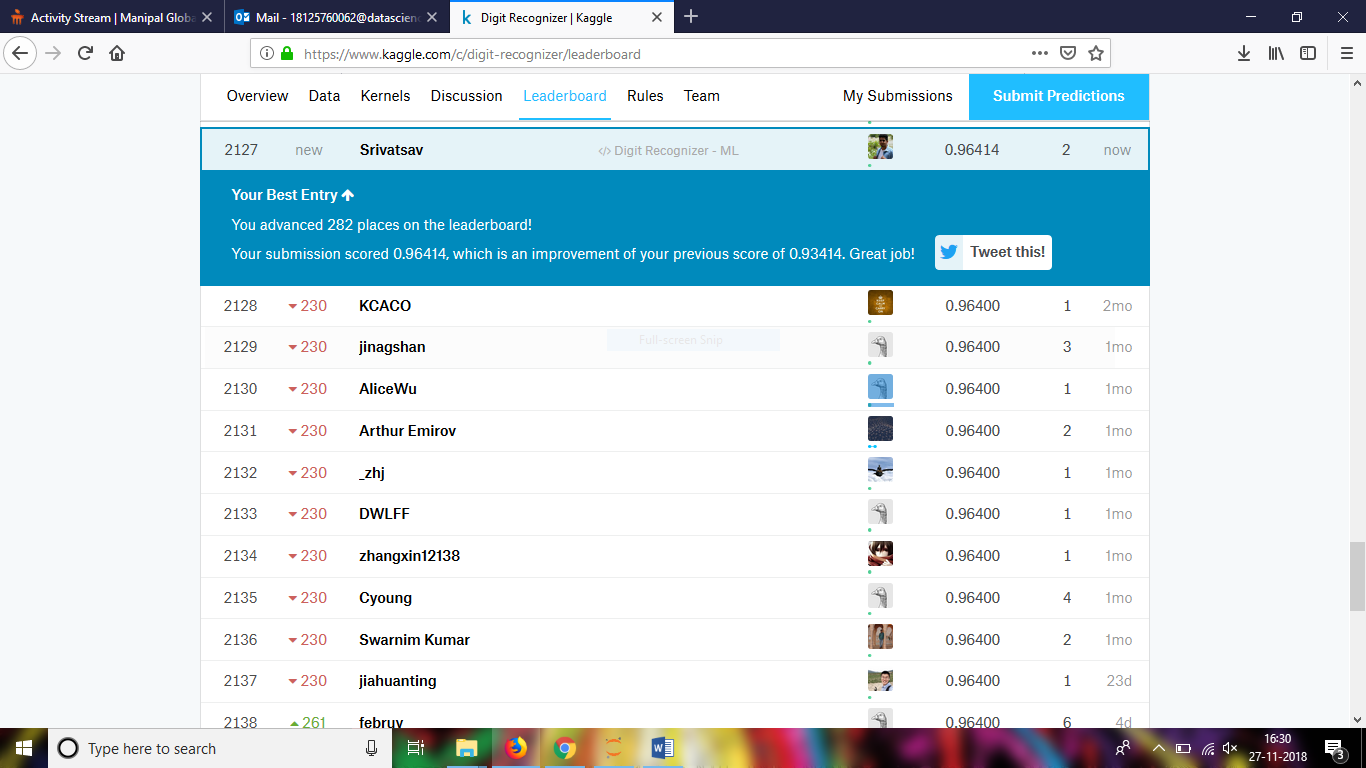

In [22]:
from IPython.display import Image
Image("C:/Users/Administrator/Desktop/digit_recog.PNG")

## Link

https://www.kaggle.com/srivatsavnarasimhan/digit-recognizer-ml